# Simulation of Stochastic Differential Equations

 Difussion process is as follows:
 
\begin{equation}
dS_t  = \kappa(S-S_t)^{\eta} dt + \sigma S_t^{\gamma}dW_t \\
\end{equation}


 Given values are as follows:
 
\begin{equation}
S_0 = 0.1, \\
\kappa = 0.5, \\
S = 0.04, \\
\eta = 2, \\
\sigma = 0.05/(S_0^{\gamma}), \\
\gamma = 3 \\
\end{equation}

# 1. Euler Scheme:

For given SDE, Euler Scheme looks as follows:

\begin{equation}
\hat{S_0} = S_0 \\
\end{equation}

\begin{equation}
\hat{S_{n+1}} = \hat{S_n} + \kappa(S - \hat{S_n})^\eta \delta + \sigma \hat{S_n}^\gamma (W_{n\delta} - W_{(n-1)\delta}) \\
\end{equation}

In [7]:
# Arguments are as follows:
# W : Simulation of Brownian Motion
# N : Number of discretization units
# T : Time
# s0, vol(sigma), k, s_bar, eta and gamma are given above


vol = (0.05/(0.1**3))
def euler_scheme(W, N, T, s0, k, s_bar, eta, gamma ):
    del_t = T/N
    
    s_t = [s0]
    
    for i in range(len(W)-1):
        s_t.append(s_t[i] + del_t*k*(s_bar - s_t[i] )**eta + vol *(s_t[i])**gamma * (W[i]))  
    return s_t

# 2. Doss Scheme:

For given SDE, Doss Scheme looks as follows:


\begin{equation}
Let, Y_t = F(S_t) = \frac{S_t^{1-\gamma}}{\sigma (1-\gamma)}\;
Then, S_t = G(Y_t) = \bigl({(1-\gamma)\sigma Y_t}\bigr)^{\frac{1}{1 - \gamma}}\\
\end{equation}

\begin{equation}
Note \:that, F^{'}(S_t) = \frac{S_t^{-\gamma}}{\sigma}. Then, \;
dY_t = \bigl(\frac{\kappa(S - S_t)^{\eta}}{\sigma S_t^{\gamma}} - \frac{\gamma \sigma S_t^{\gamma -1}}{2}\bigr)dt + dW_t\\
\end{equation}

\begin{equation}
Thus,\;
\hat{Y_0} = Y_0 = F(S_0)\\
\end{equation}


\begin{equation}
\hat{Y_{n+1}} = \hat{Y_n} + \bigl(\frac{\kappa(S - G(\hat{Y_n}))^\eta}{\sigma G(\hat{Y_n})^{\gamma}} - \frac{\gamma \sigma G(\hat{Y_n})^{\gamma - 1}}{2}\bigr)\delta + (W_{n\delta} - W_{(n-1)\delta})\\
\end{equation}

\begin{equation}
\hat{S_n} = G(\hat{Y_n})\\
\end{equation}

In [8]:
# From above solutions, doss_funct is Yt = F(St)
# Arguments are same as in Euler Scheme
def doss_funct (s, gamma):
    num   = s**(1-gamma)
    denom = vol*(1-gamma)
    s_t   = num/denom
    return s_t

# Similarly inv_doss_funct is St = G(Yt)
# Argument y is the output of the doss_funct
def inv_doss_funct(y, gamma):
    s_t = (y * vol *(1-gamma))**(1/(1-gamma))
    return s_t

# Arguments are same as in Euler Scheme
def doss_scheme(W, N, T, s0, k, s_bar, eta, gamma):
    del_t = T/N # Discretization units
    y_t = [doss_funct(s0, gamma)] # Initial value of Yt
    s_t = [inv_doss_funct(y_t[0], gamma)] # Initial value of St
    
    for i in range(len(W)-1):
        a      = inv_doss_funct(y_t[i], gamma) # calculates G(Yt)
        num1   = k*((s_bar - a)**eta) # Numerator of first expression inside large brackets
        denom1 = vol*(a**gamma) # Denominator of first expression inside large brackets
        
        num2   = gamma*vol*(a**(gamma-1)) # Numerator of second expression inside large brackets
        denom2 = 2
        
        y_t.append(y_t[i] + (num1/denom1 - num2/denom2)*del_t + (W[i]))
        s_t.append(inv_doss_funct(y_t[i], gamma))
    return s_t

# 3. Milstein Scheme:

For given SDE, Milstein Scheme looks as follows:

\begin{equation}
\hat{S_0} = S_0 \\
\end{equation}

\begin{equation}
\hat{S_{n+1}} = \hat{S_n} + \kappa(S - \hat{S_n})^\eta \delta + \sigma \hat{S_n}^\gamma (W_{n\delta} - W_{(n-1)\delta}) + \frac{1}{2} \gamma \sigma^2 \hat{S_n}^{2 \gamma -1} \bigl(W_{n\delta} - W_{(n-1)\delta})^2 -\delta \bigr)\\
\end{equation}

In [9]:
# Arguments are as follows:
# W : Simulation of Brownian Motion
# N : Number of discretization units
# T : Time
# s0, vol(sigma), k, s_bar, eta and gamma are given above

def milstein_scheme(W, N, T, s0, k, s_bar, eta, gamma):
    del_t = T/N
    s_t = [s0]
    
    for i in range(len(W)-1):
        s_t.append(s_t[i] + del_t*k*(s_bar - s_t[i] )**eta + vol *(s_t[i])**gamma * (W[i])
        + 0.5*gamma*vol**2 * s_t[i]**(2*gamma -1) * ((W[i])**2 - del_t))        
    return s_t

# 4. Plotting all three schemes:

Text(0.5, 1.0, 'Three Different Schemes with N = 256')

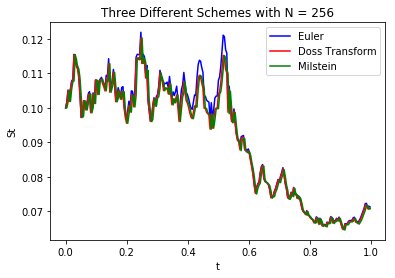

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Helper function to evenly space the grid
def frange(start, stop, step):
    i = start
    while i < stop:
         yield i
         i += step
        

W_t = np.random.normal(0,math.sqrt(1/256), 256) # Generating brownian increments 
y_e = euler_scheme(W_t,256, 1, 0.1, 0.5, 0.04, 2, 3)
y_d = doss_scheme(W_t,256, 1, 0.1, 0.5, 0.04, 2, 3)
y_m = milstein_scheme(W_t,256, 1, 0.1, 0.5, 0.04, 2, 3)

x = list(frange(0,1, 1/256))

plt.plot(x, y_e, color = 'b')
plt.plot(x, y_m, color = 'r')
plt.plot(x, y_d, color = 'g')
plt.ylabel("St")
plt.xlabel("t")
plt.legend(["Euler", "Doss Transform", "Milstein"])
plt.title("Three Different Schemes with N = 256") 